Show what the current PyCo version is 

In [36]:
!git rev-parse HEAD

1878c9944d4b4606fe28368460661ca5eb761e09


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PyCo.Topography import read_topography
from PyCo.Topography import open_topography
from PyCo.Topography import Topography 


# PyCo conventions

first index (from the left) of a numpy array: x- direction
second index : y-direction

In [38]:

heights = np.zeros((4,4))
heights[0      ,   :  ] = 1
#       same x   all y       
heights[0, -2] = 0.5
heights[1,0] = 0.25
t = Topography(heights, physical_sizes=(1,1))

In [39]:
def prepare_plot():
    fig, ax = plt.subplots()
    ax.set_aspect(1)
    ax.set_xlabel("x")
    ax.set_ylabel("y") 
    
    return fig, ax



# Different ways to plot 2D data

## Pcolormesh

### giving the x and y meshgrid

In this case nothing can go wrong because for each datapoint the x and y value is given. However `pcolormesh` interprets
the x and values as the corners of the boxes and the last z values are not displayed because there are less boxes then corners.

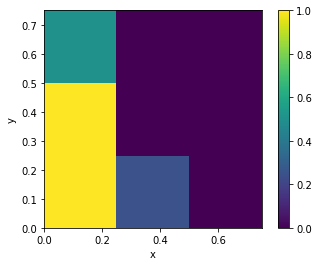

In [40]:
fig, ax = prepare_plot()   
x, y, z = t.positions_and_heights()
plt.colorbar(ax.pcolormesh(x, y, z, ))

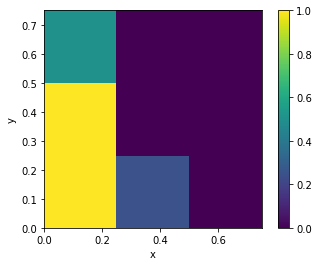

In [41]:
# check: transposing everything here doesn't change anything
fig, ax = prepare_plot()   
plt.colorbar(ax.pcolormesh(x.T, y.T, z.T))

trick: add a point to the x and y arrays so that all the z values will be displayed. 

Here we also shift the values so that (x, y) represent the center of the pixel 
rather then the left corner

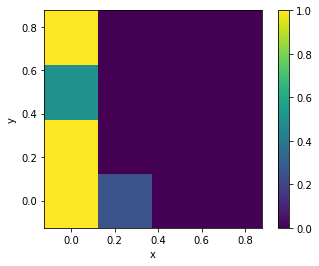

In [42]:
fig, ax = prepare_plot()   
x_ = ((np.arange(z.shape[0]+1) - 0.5) * t.pixel_size[0]).reshape(-1,1)
y_ = ((np.arange(z.shape[1]+1) - 0.5) * t.pixel_size[1]).reshape(1,-1)

cb = plt.colorbar(ax.pcolormesh(x_*np.ones_like(y_), y_*np.ones_like(x_), z))

### pcolormesh with height values only

in this case we need to comply to pcolormesh's conventions, that are different then ours. We need to transpose the data. 
Note that here all pixels are displayed. 

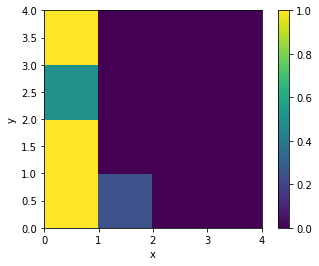

In [43]:
fig, ax = prepare_plot()   
plt.colorbar(ax.pcolormesh(z.T))


### Matshow

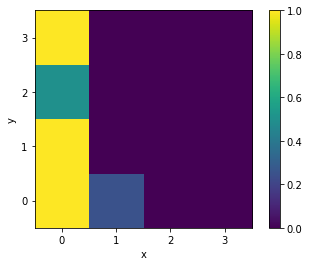

In [45]:
fig, ax = prepare_plot()

cb = plt.colorbar(ax.matshow(z.T))
ax.invert_yaxis()
ax.tick_params(labelbottom=True, bottom=True, labeltop=False, top=False)

### imshow

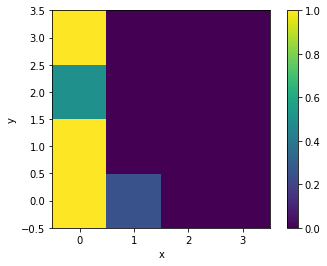

In [47]:
fig, ax = prepare_plot()

cb = plt.colorbar(ax.imshow(z.T))
ax.invert_yaxis()


## Adjust ticks

With methods that use only the height array like `imshow` the ticks correspond to the index in your array. You can display
physical values by setting the 

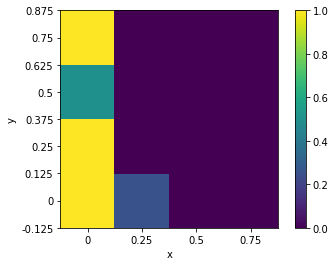

In [50]:
fig, ax = prepare_plot()
cb = plt.colorbar(ax.imshow(z.T))
ax.invert_yaxis()

import matplotlib.ticker as ticker
format_string='{0:g}'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(
        lambda x, pos: format_string.format(x*t.pixel_size[0])))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda x, pos: format_string.format(x * t.pixel_size[1] )))

or if you want to decide yourself on tick spacing

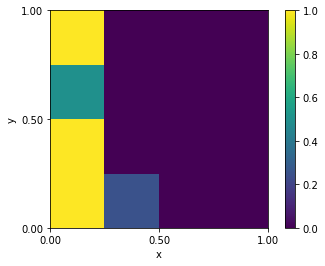

In [60]:
fig, ax = prepare_plot()
cb = plt.colorbar(ax.imshow(z.T))
ax.invert_yaxis()

nx, ny = t.nb_grid_pts
sx, sy = t.physical_sizes
ticksx = np.linspace(0, sx, 3 )
ticksy = np.linspace(0, sy, 3 )
ax.set_xticks(ticksx / sx * nx - 0.5) # convert to "index" units
ax.set_xticklabels([f"{v:.2f}" for v in ticksx])
ax.set_yticks(ticksy / sy * ny - 0.5)
ax.set_yticklabels([f"{v:.2f}" for v in ticksy]);